In [158]:
import sys
sys.path.append('/home/ak/Documents/Research/HSMM')

from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.data_utils import get_files_for_ticker
from hsmm_core.labelling import DataLabellingSimple, DataLabellingCC
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))
# for debugging
import pdb
from IPython.core.debugger import set_trace
from collections import defaultdict

In [2]:
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])i bet you 
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

In [3]:
def get_symbol_path(symbolIdx):
    symbol_path = os.path.join(nonDirectional, sorted(symbols)[symbolIdx], 'NON_DIRECTIONAL')
    return symbol_path

def list_of_symbol_dates(symbolIdx):
        return [f.split(".")[0] for f in next(os.walk(get_symbol_path(symbolIdx)))[2]]


## Labels

In [387]:
#nonDirectional contains ONLY the label files for each of the symbols. each of the labels files has the correct number of labels

nonDirectional = os.path.join('/media/ak/DataOnly/ProcessedData/labels/') 
dataOnlyDrive = '/media/ak/DataOnly/ExperimentCommonLocs/'

# symbols and their NON _DIRECTIONAL LABEL FILES
symbols = sorted(next(os.walk(nonDirectional))[1])


In [5]:
# os.listdir('/media/ak/DataOnly/Labels')

In [372]:
number_of_symbols = len(symbols)
print(number_of_symbols)

# each containing a lot of the symbols that I need with the rest of the dates
next(os.walk(nonDirectional))
symbolIdx = 10
symbol= symbols[symbolIdx]
symbolPath = os.path.join(nonDirectional, symbol, 'NON_DIRECTIONAL')
date_files = next(os.walk(symbolPath))[2]


51


In [373]:
ranges = [ -0.001,-0.0001, 0, 0.001, 0.0012, 0.002]
for dateIdx in range(0, 50):
    testFile =pd.read_csv(os.path.join(symbolPath, date_files[dateIdx]))
    print(testFile.ReturnTradedPrice.groupby(pd.cut(testFile.ReturnTradedPrice, ranges)).count())

ReturnTradedPrice
(-0.001, -0.0001]    101
(-0.0001, 0.0]       836
(0.0, 0.001]         142
(0.001, 0.0012]        0
(0.0012, 0.002]        3
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]     299
(-0.0001, 0.0]       1943
(0.0, 0.001]          351
(0.001, 0.0012]         0
(0.0012, 0.002]         0
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]    1307
(-0.0001, 0.0]       4923
(0.0, 0.001]         1341
(0.001, 0.0012]         3
(0.0012, 0.002]         5
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]     240
(-0.0001, 0.0]       1431
(0.0, 0.001]          265
(0.001, 0.0012]         2
(0.0012, 0.002]         1
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]     229
(-0.0001, 0.0]       1324
(0.0, 0.001]          285
(0.001, 0.0012]         3
(0.0012, 0.002]         5
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]     242
(-0.0001, 0.0]       1660
(0.0,

In [374]:
x =testFile.ReturnTradedPrice.rolling(15).mean()
x.quantile(0.1)
x.quantile(0.25)
x.quantile(0.75) # 0.00004263937891865502

4.263937891865502e-05

In [375]:
quantiles25 =dict()
quantiles75 =dict()
returnTradedPriceDict = dict()
median=dict()
for dateIdx in range(0, 100):
    date =(date_files[dateIdx].split(".")[0])
    filedateIdx =pd.read_csv(os.path.join(symbolPath, date_files[dateIdx]))
    quantiles25[date] =filedateIdx.ReturnTradedPrice.rolling(15).quantile(0.35)
    quantiles75[date] =filedateIdx.ReturnTradedPrice.rolling(15).quantile(0.65)
    median[date] =filedateIdx.ReturnTradedPrice.rolling(15).median()

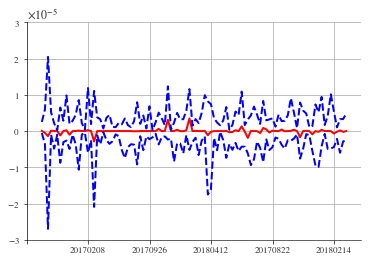

In [376]:
fig, ax = plt.subplots()

_=ax.plot(pd.DataFrame(median).mean(axis=0), color ='r')
_=ax.plot(pd.DataFrame(quantiles25).mean(axis=0), linestyle='--', color ='blue')
_=ax.plot(pd.DataFrame(quantiles75).mean(axis=0),color= 'blue', linestyle='--')
start, end = ax.get_xlim()
plt.xticks(fontsize =9)
plt.yticks(fontsize =9)
plt.grid(True)
_=ax.xaxis.set_ticks(np.arange(start, end, 20))

In [377]:

def labelling_simple_all(input_array, updown_pct):
    
    if np.all( (1+updown_pct)*input_array[:-1] <= input_array[-1] ):
        return 1
    else:
        
        return -1


In [378]:
#filedateIdx[['ReturnTradedPrice']][:-1] #.rolling(window=5, min_periods=2).apply(lambda t:labelling_simple_all(t, updown_pct=0.0001)) 

In [379]:
#filedateIdx[['ReturnTradedPrice']].rolling(window =5, min_periods =2 ).apply(lambda t: labelling_simple_all( t, 0.2))

In [380]:
x =filedateIdx[['ReturnTradedPrice']].rolling(window =5, min_periods =1 ).mean()*(1+0.0002) -filedateIdx[['ReturnTradedPrice']].rolling(window =15, min_periods =2 ).mean()

In [381]:
ranges = [ -0.000083, -0.000041, 0.000041]
print (x.quantile(0.1), x.quantile(0.25), x.quantile(0.75))

ReturnTradedPrice   -0.000083
Name: 0.1, dtype: float64 ReturnTradedPrice   -0.000041
Name: 0.25, dtype: float64 ReturnTradedPrice    0.000041
Name: 0.75, dtype: float64


In [382]:
pd.DataFrame(x).describe()

,ReturnTradedPrice
count,1.830000e+03
mean,1.019289e-07
std,9.010484e-05
min,-1.165358e-03
25%,-4.124055e-05
50%,0.000000e+00
75%,4.124137e-05
max,8.202472e-04


In [383]:
#9.010484e-05  #0.000023.
0.00009010484/2

4.505242e-05

In [384]:
trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter, ccy_bar=1000)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)

labelling_method_params = [
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 40,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.00005,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 8,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.00009,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 24,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.00005,
    'threshold_method': ThresholdMethod.arbitrary,}
    ,
{
    'labelling_method': LabellingChoice.ep_in_window,
    'rolling_window': 9,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0004,
    'threshold_method': ThresholdMethod.arbitrary,},
    {
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 15,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0001},
    {
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 15,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.000028}]



In [385]:
alternate_label_values =['label_PrMov__window_5__thres_arbitrary__0.1',
                         'label_PrMov__window_40__thres_arbitrary__0.0',
                         'label_MovAv__window_8__thres_arbitrary__0.0',
                         'label_PrMov__window_24__thres_arbitrary__0.0',
                         'label_EndPo__window_9__thres_arbitrary__0.0',
                         'label_MovAv__window_15__thres_arbitrary__0.0']

LabelsAlternateNames = ['LabelsAlternateOne', 'LabelsAlternateTwo',  
                        'LabelsAlternateThree', 'LabelsAlternateFour',  
                        'LabelsAlternateFive', 'LabelsAlternateSix', 
                        'LabelsAlternateSeven']


In [322]:

### 
index =10 # correspond to a symbol
# for index in range(20,56):
print("index --->", index)
ticker = str(symbols[index])
print(ticker)
nonDirectionalSymbol = get_symbol_path(index) # the non-directional labels path
print(nonDirectionalSymbol)
listofDates = sorted(get_files_for_ticker(ticker))
print ('Ticker', ticker, ' and labels', len(listofDates))
# v stupid check but necessary- maybe cache is the issue but whatever
print(sorted(listofDates)[len(listofDates)-1] ==listofDates[-1])

# ## step 1
sd = listofDates[0] # this must be set to 0 otherwirse it is problematic
ed = listofDates[2] # added a check before
print(sd, ed)

index ---> 10
CPG.L
/media/ak/DataOnly/ProcessedData/labels/CPG.L/NON_DIRECTIONAL
Ticker CPG.L  and labels 140
True
20170201 20170203


In [323]:

# trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)

## Label construction starts here

In [415]:

### 
# index =38 # correspond to a symbol
# for index in [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]:
for index in [31, 32, 33, 34, 35 ,36, 37, 38 ,39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]:
    print("index --->", index)
    ticker = str(symbols[index])
    print(ticker)
    nonDirectionalSymbol = get_symbol_path(index) # the non-directional labels path
    print(nonDirectionalSymbol)
    listofDates = sorted(get_files_for_ticker(ticker))
    print ('Ticker', ticker, ' and labels', len(listofDates))
    # v stupid check but necessary- maybe cache is the issue but whatever
    print(sorted(listofDates)[len(listofDates)-1] ==listofDates[-1])

    ## step 1
    sd = listofDates[0] # this must be set to 0 otherwirse it is problematic
    ed = listofDates[len(listofDates)-1] # added a check before

    trading_hours_filter = TradingHours.only_mkt_hours

    data_loader = DataLoader(trading_hours_filter)

    data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)

    # this is the core of label creation ## 
    for label_init in labelling_method_params:
        labeller = DataLabellingSimple(label_init)
        the_label = labeller.get_label_name()
        labeller.label_training_data(data)
    print('Finished Creating Labels')  
    print((list(data.keys())))

    # ## step 2 - this is BS
    print(data[list(data.keys())[0]].filter(like='label', axis=1).columns.values)
    ## step 3
    dfs = defaultdict(dict)
    for idex , dateIdex in enumerate(list(data.keys())):
        print(idex)
        print('Date:', dateIdex)
        for alternate_label_value_idex, alternate_label_value in enumerate(alternate_label_values):
            print('Current Alternate Label Value: ',LabelsAlternateNames[alternate_label_value_idex])        
            df = data[dateIdex][['TradedTime', 'TradedPrice', 'ReturnTradedPrice', 'Volume','Duration',str(alternate_label_value)]]

            label_symbol_date_path = os.path.join(dataOnlyDrive,LabelsAlternateNames[alternate_label_value_idex], ticker)

            filename = os.path.join(label_symbol_date_path,dateIdex+'.csv')

            if os.path.exists(label_symbol_date_path) ==True:
                print('Saving the dataframe CSV')
                print('path_exists')
                df.to_csv(filename)
            else:
                os.makedirs(label_symbol_date_path)
                print('Produced this directory: ', label_symbol_date_path)
                df.to_csv(filename)
    print('### Finished###')

index ---> 31
PSON.L
/media/ak/DataOnly/ProcessedData/labels/PSON.L/NON_DIRECTIONAL
Ticker PSON.L  and labels 89
True
Finished Creating Labels
['20170116', '20170117', '20170118', '20170119', '20170120', '20170123', '20170124', '20170125', '20170126', '20170127', '20170130', '20170131', '20170703', '20170704', '20170705', '20170706', '20170707', '20170710', '20170711', '20170712', '20170713', '20170714', '20170717', '20170718', '20170719', '20170720', '20170721', '20170724', '20170725', '20170726', '20170727', '20170728', '20170731', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20180201', '20180202', '20180205', '20180206', '20180207', '20180208', '20180209', '20180212', '20180213', '20180214', '20180215', '20180216', '20180219', '20180220', '20180221', '20180222', '201

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
13
Date: 20170704
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
14
Dat

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
29
Date: 20170726
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
30
Date: 20170727
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
48
Date: 20170822
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
49
Date: 20170823
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
64
Date: 20180214
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
65
Date: 20180215
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
81
Date: 20180411
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
82
Date: 20180412
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlt

4
Date: 20170120
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
5
Date: 20170123
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
20
Date: 20170713
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
21
Date: 20170714
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
37
Date: 20170807
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
38
Dat

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
53
Date: 20170830
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
54
Dat

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
69
Date: 20171221
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
70
Dat

84
Date: 20180215
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
85
Date: 20180216
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
100
Date: 20180411
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
101
Date: 20180412
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
6
Date: 20170124
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
7
Date: 20170125
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
23
Date: 20170714
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
24
Date: 20170717
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
38
Date: 20170804
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
39
Date: 20170807
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlt

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
56
Date: 20170831
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
57
Dat

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
72
Date: 20171222
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
73
Date: 20171227
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
89
Date: 20180220
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
90
Date: 20180221
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
105
Date: 20180416
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Savin

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
6
Date: 20170124
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
7
Date: 20170125
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
pat

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
23
Date: 20170718
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
24
Date: 20170719
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
39
Date: 20170809
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
40
Date: 20170810
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
55
Date: 20170901
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
56
Dat

70
Date: 20170922
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
71
Date: 20170925
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
86
Date: 20171215
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
87
Date: 20171218
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
102
Date: 20180212
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
103
Date: 20180213
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
118
Date: 20180406
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
119
Date: 20180409
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CS

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
2
Date: 20170118
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
3
Date: 20170119
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
pat

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
18
Date: 20170707
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
19
Date: 20170710
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
34
Date: 20170731
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
35
Date: 20170801
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

51
Date: 20170823
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
52
Date: 20170824
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
67
Date: 20170915
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
68
Date: 20170918
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
83
Date: 20171208
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
84
Date: 20171211
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
99
Date: 20180405
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
100
Date: 20180406
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
4
Date: 20170120
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
5
Date: 20170123
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
pat

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
25
Date: 20170725
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
26
Date: 20170726
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
43
Date: 20170818
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
44
Dat

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
62
Date: 20170915
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
63
Date: 20170918
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
79
Date: 20171211
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
80
Date: 20171212
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

94
Date: 20180405
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
95
Date: 20180406
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


5
Date: 20170710
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
6
Date: 20170711
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
pa

20
Date: 20170731
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
21
Date: 20170801
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


35
Date: 20170821
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
36
Date: 20170822
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
53
Date: 20170915
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
54
Date: 20170918
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlte

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
69
Date: 20180308
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
70
Dat

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
84
Date: 20180329
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
85
Date: 20180403
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Finished Creating Labels
['20170703', '20170704', '20170705', '20170706', '20170707', '20170710', '20170711', '20170712', '20170713', '20170714', '20170717', '20170718', '20170719', '20170720', '20170721', '20170724', '20170725', '20170726', '20170727', '20170728', '20170731', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20170901', '20170904', '20170905', '20170906', '20170907', '20170908', '20170911', '20170912', '20170913', '20170914', '20170915', '20170918', '20170919', '20170920', '20170921', '20170922', '20170925', '20170926', '20170927', '20170928', '20170929', '20180301', '20180302', '20180403', '20180404', '20180405', '20180406', '20180409', '20180410', '20180411', '20180412', '20180413', '20180416', '20180417', '20180418', '20180419', '20180420']
['label_PrMov_

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
17
Date: 20170726
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
18
Date: 20170727
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
33
Date: 20170817
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
34
Dat

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
49
Date: 20170911
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
50
Date: 20170912
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlte

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
64
Date: 20180301
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
65
Date: 20180302
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Finished Creating Labels
['20170703', '20170704', '20170705', '20170706', '20170707', '20170710', '20170711', '20170712', '20170713', '20170714', '20170717', '20170718', '20170719', '20170720', '20170721', '20170724', '20170725', '20170726', '20170727', '20170728', '20170731', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20170901', '20170904', '20170905', '20170906', '20170907', '20170908', '20170911', '20170912', '20170913', '20170914', '20170915', '20170918', '20170919', '20170920', '20170921', '20170922', '20170925', '20170926', '20170927', '20170928', '20170929', '20180403', '20180404', '20180405', '20180406', '20180409', '20180410', '20180411', '20180412', '20180413', '20180416', '20180417', '20180418', '20180419', '20180420']
['label_PrMov__window_5__thres_arbitra

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
15
Date: 20170724
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
16
Date: 20170725
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
32
Date: 20170816
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
33
Date: 20170817
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
53
Date: 20170915
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
54
Date: 20170918
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
72
Date: 20180413
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
73
Date: 20180416
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

7
Date: 20170712
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
8
Date: 20170713
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
27
Date: 20170809
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
28
Date: 20170810
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
49
Date: 20170911
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
50
Date: 20170912
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
65
Date: 20180404
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
66
Dat

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
8
Date: 20170713
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
9
Date: 20170714
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path

27
Date: 20170809
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
28
Date: 20170810
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
43
Date: 20170901
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
44
Date: 20170904
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
59
Date: 20170925
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
60
Date: 20170926
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
76
Date: 20180419
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
77
Date: 20180420
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
11
Date: 20170718
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
12
Dat

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
27
Date: 20170809
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
28
Date: 20170810
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlte

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
44
Date: 20170904
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
45
Date: 20170905
Current Alternate Label Value:  LabelsA

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
60
Date: 20170926
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
61
Date: 20170927
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
76
Date: 20180419
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
77
Date: 20180420
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
14
Date: 20170721
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
15
Date: 20170724
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
36
Date: 20170822
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
37
Date: 20170823
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
53
Date: 20170915
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
54
Date: 20170918
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
70
Date: 20180309
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
71
Dat

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
87
Date: 20180405
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
88
Date: 20180406
Current Alternate Label Value:  LabelsA

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
22
Date: 20170802
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
23
Date: 20170803
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
44
Date: 20170904
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
45
Date: 20170905
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlte

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
68
Date: 20180307
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
69
Date: 20180308
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlt

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
88
Date: 20180406
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
89
Date: 20180409
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
3
Date: 20170704
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
4
Date:

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
19
Date: 20170726
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
20
Date: 20170727
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
34
Date: 20170816
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
35
Date: 20170817
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
50
Date: 20170908
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
51
Date: 20170911
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
67
Date: 20180302
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
68
Date: 20180305
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
82
Date: 20180323
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
83
Date: 20180326
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
99
Date: 20180419
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
100
Date: 20180420
Current Alternate Label Value:  Labels

10
Date: 20170717
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
11
Date: 20170718
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
27
Date: 20170809
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
28
Dat

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
44
Date: 20170904
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
45
Date: 20170905
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

59
Date: 20170925
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
60
Date: 20170926
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
76
Date: 20180319
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
77
Date: 20180320
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
92
Date: 20180412
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
93
Dat

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
4
Date: 20170606
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
5
Date: 20170607
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
20
Date: 20170628
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
21
Dat

35
Date: 20170719
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
36
Date: 20170720
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
51
Date: 20170810
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
52
Date: 20170811
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
67
Date: 20170904
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
68
Date: 20170905
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

82
Date: 20170925
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
83
Date: 20170926
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


97
Date: 20180315
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
98
Date: 20180316
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


112
Date: 20180409
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
113
Date: 20180410
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CS

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
6
Date: 20170609
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
7
Date: 20170612
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
pat

Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
24
Date: 20170705
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
25
Date: 20170706
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
p

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
45
Date: 20170803
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
46
Date: 20170804
Current Alternate Label Value:  LabelsA

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
60
Date: 20170824
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
61
Date: 20170825
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlte

76
Date: 20170918
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
77
Date: 20170919
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
95
Date: 20180314
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
96
Date: 20180315
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
113
Date: 20180411
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
114
Date: 20180412
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
4
Date: 20170602
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
5
Date:

Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
20
Date: 20170626
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
21
Date: 20170627
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
p

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
36
Date: 20170718
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
37
Dat

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
51
Date: 20170808
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
52
Date: 20170809
Current Alternate Label Value:  LabelsA

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
67
Date: 20170831
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
68
Date: 20170901
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
83
Date: 20170922
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
84
Date: 20170925
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
pa

Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
99
Date: 20180315
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
100
Da

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
114
Date: 20180409
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
115
Date: 20180410
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV


4
Date: 20170607
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
5
Date: 20170608
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
pa

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
21
Date: 20170630
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
22
Date: 20170703
Current Alternate Label Value:  LabelsA

Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
36
Date: 20170721
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
37
Date: 20170724
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlt

52
Date: 20170814
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
53
Date: 20170815
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


68
Date: 20170906
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
69
Date: 20170907
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
87
Date: 20180302
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
88
Dat

Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
103
Date: 20180326
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
104
Date: 20180327
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV


Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
118
Date: 20180418
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
Saving the dataframe CSV
path_exists
119
Date: 20180419
Current Alternate Label Value:  LabelsAlternateOne
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
Saving the dataframe CSV

IndexError: list index out of range

In [416]:
print(data[list(data.keys())[0]].filter(like='label', axis=1).columns.values)

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']


In [417]:
data_keys  = list(data.keys())
dict_1 =dict()
dict_2 =dict()
dict_3 =dict()
dict_4 =dict()
dict_5 =dict()
dict_6 =dict()
# ----------------- # ------------------- # ------------------------------------- #
for keyIdx, _ in enumerate(data_keys):
    dict_1[keyIdx] = (data[data_keys[keyIdx]]['label_PrMov__window_5__thres_arbitrary__0.1'].value_counts())
    dict_2[keyIdx] =(data[data_keys[keyIdx]]['label_PrMov__window_40__thres_arbitrary__0.0'].value_counts())
    dict_3[keyIdx] =(data[data_keys[keyIdx]]['label_MovAv__window_8__thres_arbitrary__0.0'].value_counts())

    dict_4[keyIdx] =(data[data_keys[keyIdx]]['label_PrMov__window_24__thres_arbitrary__0.0'].value_counts())
    dict_5[keyIdx] =(data[data_keys[keyIdx]][ 'label_EndPo__window_9__thres_arbitrary__0.0'].value_counts())

    dict_6[keyIdx] =(data[data_keys[keyIdx]]['label_MovAv__window_15__thres_arbitrary__0.0'].value_counts())




In [418]:
print(pd.DataFrame(dict_1).mean(axis=1)) #label 1
print(pd.DataFrame(dict_2).mean(axis=1)) # label 2
print(pd.DataFrame(dict_3).mean(axis=1)) # label 3 # best
print(pd.DataFrame(dict_4).mean(axis=1)) # label 4
print(pd.DataFrame(dict_5).mean(axis=1)) # label 5
print(pd.DataFrame(dict_6).mean(axis=1)) # label 6



0.0    2810.545455
1.0     109.900826
dtype: float64
1.0    2337.099174
0.0     548.347107
dtype: float64
-1.0    977.404959
 0.0    963.710744
 1.0    976.330579
dtype: float64
1.0    2216.619835
0.0     684.826446
dtype: float64
-1.0     817.008264
 0.0    1289.181818
 1.0     810.256198
dtype: float64
-1.0    1300.545455
 0.0     300.487603
 1.0    1309.413223
dtype: float64


In [405]:
os.path.isfile('/media/ak/DataOnly/ProcessedData/labels/IEER.L/NON_DIRECTIONAL/20170703.csv')

True

In [329]:
# for idex , dateIdex in enumerate(list(data.keys())):
#     print(idex)
#     print('Date:', dateIdex)
#     for alternate_label_value_idex, alternate_label_value in enumerate(alternate_label_values):
#         print('Current Alternate Label Value: ',LabelsAlternateNames[alternate_label_value_idex])        
#         df = data[dateIdex][['TradedTime', 'TradedPrice', 'ReturnTradedPrice', 'Volume',
#        'Duration',str(alternate_label_value)]]

#         label_symbol_date_path = os.path.join(dataOnlyDrive,LabelsAlternateNames[alternate_label_value_idex], ticker)

#         filename = os.path.join(label_symbol_date_path,dateIdex+'.csv')

#         if os.path.exists(label_symbol_date_path) ==True:
#             print('Saving the dataframce CSV')
#             print('path_exists')
#             df.to_csv(filename)
#         else:
#             os.makedirs(label_symbol_date_path)
#             print('Produced this directory: ', label_symbol_date_path)
#             df.to_csv(filename)


## example visualisation to be moved to a different script


In [330]:
from IPython.display import display
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import string

In [331]:
keys=list(data.keys())
from collections import defaultdict
labelsDict_1 = defaultdict(dict)
labelsDict_2 = defaultdict(dict)

for key in keys:
    df =pd.DataFrame(data[key])
    differentLabelTypes = df.filter(like='label', axis=1).columns.values
    print(differentLabelTypes)
    print(differentLabelTypes.shape[0])
    for i in range(differentLabelTypes.shape[0]):
        #print(i)
        try:
            #print(key)
            labelsDict_1[differentLabelTypes[i]][key] = df[differentLabelTypes[i]].value_counts()[1]
            labelsDict_2[differentLabelTypes[i]][key] = df[differentLabelTypes[i]].value_counts()[0]

        except:
            print('continuing')
            continue

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

In [332]:
dfFromDict = df.from_dict(labelsDict)
dfDesc = df.from_dict(labelsDict).describe()


In [333]:
dfDesc_1 = df.from_dict(labelsDict_1)
dfDesc_2 = df.from_dict(labelsDict_2)

In [334]:
differentLabelTypes[5]

'label_MovAv__window_15__thres_arbitrary__0.0'

In [339]:
labelsDict

defaultdict(dict,
            {'label_PrMov__window_5__thres_arbitrary__0.1': {'20170116': 0.03378132945877225,
              '20170117': 0.04352895452778857,
              '20170118': 0.04316546762589928,
              '20170119': 0.026845637583892617,
              '20170120': 0.044142614601018676,
              '20170123': 0.05006418485237484,
              '20170124': 0.036139455782312924,
              '20170125': 0.043249341857841295,
              '20170126': 0.04280618311533888,
              '20170127': 0.03488879197557784,
              '20170130': 0.046118721461187215,
              '20170131': 0.017704778156996587,
              '20170703': 0.004819277108433735,
              '20170704': 0.00788436268068331,
              '20170705': 0.00853932584269663,
              '20170706': 0.007874015748031496,
              '20170707': 0.017459361830222758,
              '20170710': 0.01412989588497769,
              '20170711': 0.014940239043824702,
              '20170712': 0.0127

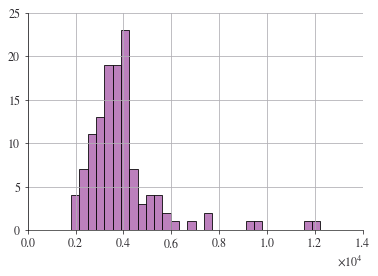

In [340]:
import matplotlib.pyplot as plt
%matplotlib inline
balanceKeys = labelsDict_1.keys()

df.from_dict(labelsDict_1)[differentLabelTypes[1]].hist(bins=30)

# plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[1]].median(), color='r', linestyle='dashed', linewidth=1)
# x= df.from_dict(labelsDict)[differentLabelTypes[1]]
# print([differentLabelTypes[3]])
# min_ylim, max_ylim = plt.ylim()
# plt.figtext(x.median()*0.3, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()), fontsize =15)
# plt.figtext(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()), fontsize =15)
# plt.annotate(r"$\}$",fontsize=24,
#             xy=(0.27, 0.77), xycoords='figure fraction'
#             )
# plt.text(13.1,1, text , fontsize=15)
plt.show()

['label_PrMov__window_24__thres_arbitrary__0.0']


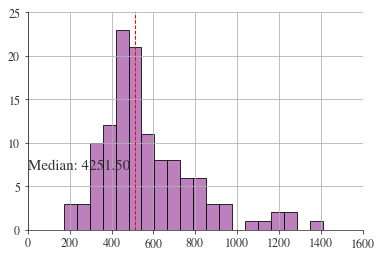

In [342]:
df.from_dict(labelsDict_2)[differentLabelTypes[1]].hist(bins=20)
plt.axvline(df.from_dict(labelsDict_2)[differentLabelTypes[1]].median(), color='r', linestyle='dashed', linewidth=1)
x= df.from_dict(labelsDict_2)[differentLabelTypes[0]]
print([differentLabelTypes[3]])
min_ylim, max_ylim = plt.ylim()
plt.text(2.3, 6.9, 'Median: {:.2f}'.format(x.median()), fontsize =15)
# plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()), fontsize =15)
# plt.annotate(r"$\}$",fontsize=24,
#             xy=(0.27, 0.77), xycoords='figure fraction'
#             )
# plt.figtext(.95, .49, describe_helper(pd.Series(x))[0], {'multialignment':'left'})
# plt.figtext(1.05, .49, describe_helper(pd.Series(x))[1], {'multialignment':'right'})
plt.show()




In [346]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
def price_based_histogram_labels(x, labelText):
    x= np.array(x.dropna())
    ax = sns.distplot(x, fit=norm, kde=True, bins=20)
   # _=ax.text(x.std()*0.5, max_ylim*0.5, 'Median: {:.2f}'.format(np.median(x)), {'multialignment':'right'})
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    _=ax.text(0.9, 1.1, 'StDev: {:.2f}'.format(x.std()))
    #plt.title('Rolling window of ' + labelText.split("_")[4] + ' , threshold ' + labelText.split("_")[-1] )
    plt.tight_layout() 
    plt.show()
# for i in range(0,5):
#     x= df.from_dict(labelsDict_1)[differentLabelTypes[i]]
#     price_based_histogram_labels(x, labelText= differentLabelTypes[i])

/home/ak/anaconda3/envs/mmd-kernels/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


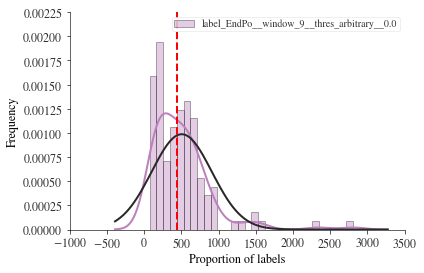

In [352]:
fig, ax = plt.subplots()
labelIdx = 4
label = str(differentLabelTypes[labelIdx])
x= np.array(df.from_dict(labelsDict_1)[differentLabelTypes[labelIdx]].dropna())
ax = sns.distplot(x, fit=norm, kde=True, bins=30, label =label)
_=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Proportion of labels') # <--------------- Set x axis label
ax.set_ylabel('Frequency') # <--------- Set y axis label
ax.legend(loc='best') # <-------- Move the legend
sns.despine()